<a href="https://colab.research.google.com/github/GiovanniReguzzoni/modelliNLP/blob/main/bertMULTIrecensioni2epoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import csv

In [ ]:
!pip install datasets transformers huggingface_hub

     |████████████████████████████████| 325 kB 4.1 MB/s 
     |████████████████████████████████| 4.0 MB 57.3 MB/s 
     |████████████████████████████████| 77 kB 8.1 MB/s 
     |████████████████████████████████| 1.1 MB 54.4 MB/s 
     |████████████████████████████████| 136 kB 79.7 MB/s 
     |████████████████████████████████| 212 kB 58.0 MB/s 
     |████████████████████████████████| 127 kB 74.7 MB/s 
     |████████████████████████████████| 596 kB 63.8 MB/s 
     |████████████████████████████████| 895 kB 64.9 MB/s 
     |████████████████████████████████| 6.5 MB 52.3 MB/s 
     |████████████████████████████████| 94 kB 4.6 MB/s 
     |████████████████████████████████| 144 kB 77.9 MB/s 
     |████████████████████████████████| 271 kB 76.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling

In [ ]:
from datasets import Dataset


In [ ]:
dftestl = pd.read_feather('/content/dftestRECfea')

In [ ]:
dftrain = pd.read_feather('/content/dftrainRECfea')

In [ ]:
dftest1 = pd.read_feather('/content/dftestRECfea')

In [ ]:
dftrain.head()

,testo,label polarità,label sentimento
0,"Ottimo prodotto di marca, la qualità é veramen...",5,1
1,Ottimo rasoio dal semplice utilizzo. Rade molt...,5,1
2,Un quarto delle dimensioni dello Show original...,5,1
3,Il prodotto si presenta esattamente come in fo...,5,1
4,"Superlativa, velocità in scrittura superiore a...",5,1


In [ ]:
dftrain = dftrain.rename(columns={'testo': 'text'})
dftestl = dftestl.rename(columns={'sentence': 'text'})
dftest1 = dftest1.rename(columns={'sentence': 'text'})

In [ ]:
dftrain = dftrain.rename(columns={'label polarità': 'label'})
dftestl = dftestl.rename(columns={'score': 'label'})
dftest1 = dftest1.rename(columns={'score': 'label'})

In [ ]:
dftest1.columns

Index(['text', 'label', 'sentimento'], dtype='object')

In [ ]:
dftestl = dftestl.drop('sentimento', 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
dftrain = dftrain.drop('label sentimento', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
dftest1 = dftest1.drop('sentimento', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
dftestl.dtypes

text     object
label     int64
dtype: object

In [ ]:
dftrain.dtypes

text     object
label     int64
dtype: object

In [ ]:
dftrain.head(100)

,text,label
0,"Ottimo prodotto di marca, la qualità é veramen...",5
1,Ottimo rasoio dal semplice utilizzo. Rade molt...,5
2,Un quarto delle dimensioni dello Show original...,5
3,Il prodotto si presenta esattamente come in fo...,5
4,"Superlativa, velocità in scrittura superiore a...",5
...,...,...
95,l'iphone è in buone condizioni ma la carica de...,3
96,Il telefono è arrivato 2 giorni in anticipo ri...,5
97,"Lo zaino come ogni eastpak è davvero dello, be...",5
98,Un telefono ottimo per il prezzo accettabile. ...,5


In [ ]:
dftrain['label'] = dftrain['label']-1 
dftest1['label'] = dftest1['label']-1 
dftestl['label'] = dftestl['label']-1 

In [ ]:
dftrain.head()

,text,label
0,"Ottimo prodotto di marca, la qualità é veramen...",4
1,Ottimo rasoio dal semplice utilizzo. Rade molt...,4
2,Un quarto delle dimensioni dello Show original...,4
3,Il prodotto si presenta esattamente come in fo...,4
4,"Superlativa, velocità in scrittura superiore a...",4


In [ ]:
dftrain = dftrain.rename(columns={'text ': 'text'})
dftestl = dftestl.rename(columns={'text ': 'text'})

In [ ]:
dftrain = dftrain.rename(columns={'hs': 'label'})
dftestl = dftestl.rename(columns={'hs': 'label'})

In [ ]:
dftest1 = dftest.drop('id', 1)

NameError: ignored

In [ ]:
dftest1

,text,label
0,"spendi poco, hai poco, se cerchi una buona qua...",0
1,La batteria lascia perdere un po’ a desiderare...,3
2,ho voluto provare queste cartucce compatibili....,2
3,"Fa il suo dovere, non si può pretendere troppo...",4
4,Miglior acquisto degli ultimi tempi! Sia per l...,4
...,...,...
1195,Arrivata in tempi record fa al massimo il prop...,4
1196,Il libro è stato acquistato per mia figlia di ...,4
1197,Gran gran prodotto per quel prezzoPossessore d...,4
1198,Ho comprato questo rasoio in base alle altre r...,4


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
dftrain.dtypes

text     object
label     int64
dtype: object

In [ ]:
!apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2,129 kB]
Fetched 2,129 kB in 2s (999 kB/s)
Selecting previously unselected package git-lfs.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.3.4-1_amd64.deb ...
Unpacking git-lfs (2.3.4-1) ...
Setting up git-lfs (2.3.4-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
# bert-base-multilingual-uncased

from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-uncased")

https://huggingface.co/bert-base-multilingual-uncased/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp4x_yys5w


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-multilingual-uncased/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/1b935b135ddb021a7d836c00f5702b80d11d348fd5c5a42cbd933d8ed1f55be9.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
creating metadata file for /root/.cache/huggingface/transformers/1b935b135ddb021a7d836c00f5702b80d11d348fd5c5a42cbd933d8ed1f55be9.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
loading configuration file https://huggingface.co/bert-base-multilingual-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/af4e101d208f361f141144dca21e9c4148aaf0e85441c2e335743d10829c6cad.d63adade93e44e64bedd306ec82ffd33eedabaf0ff08aabe581acaa48616a508
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": 

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-multilingual-uncased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/269f2943d168a4cd2ddf3864cee89d7f7d78873b3d14a1229174d37212981a38.92022aa29ab6663b0b4254744f28ab43e6adf4deebe0f26651e6c61f28f69d8b
creating metadata file for /root/.cache/huggingface/transformers/269f2943d168a4cd2ddf3864cee89d7f7d78873b3d14a1229174d37212981a38.92022aa29ab6663b0b4254744f28ab43e6adf4deebe0f26651e6c61f28f69d8b
https://huggingface.co/bert-base-multilingual-uncased/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpstpj9ju1


Downloading:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-multilingual-uncased/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/857db185d48b92f3e6141ef5092d8d5dbebab7eef1bacc6c9eaf85cf23807641.73ad1f9fd9f94089672128003fb4a687b64b73b2bfb8d08766bbc71feec8cd96
creating metadata file for /root/.cache/huggingface/transformers/857db185d48b92f3e6141ef5092d8d5dbebab7eef1bacc6c9eaf85cf23807641.73ad1f9fd9f94089672128003fb4a687b64b73b2bfb8d08766bbc71feec8cd96
loading file https://huggingface.co/bert-base-multilingual-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/269f2943d168a4cd2ddf3864cee89d7f7d78873b3d14a1229174d37212981a38.92022aa29ab6663b0b4254744f28ab43e6adf4deebe0f26651e6c61f28f69d8b
loading file https://huggingface.co/bert-base-multilingual-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/857db185d48b92f3e6141ef5092d8d5dbebab7eef1bacc6c9eaf85cf23807641.73ad1f9fd9f94089672128003fb4a687b64b73b2bfb8d08766b

In [ ]:
#Preparazione degli input di testo per il modello

def preprocess_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


In [ ]:
#converte pandas in dataframe

train = Dataset.from_pandas(dftrain)
testl = Dataset.from_pandas(dftestl)

In [ ]:
test1 = Dataset.from_pandas(dftestl)

In [ ]:
train.features


{'label': Value(dtype='int64', id=None),
 'text': Value(dtype='string', id=None)}

In [ ]:
tokentrain = train.map(preprocess_function, batched=True)
tokentestl = testl.map(preprocess_function, batched=True)

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
#test senza label
tokentest1 = test1.map(preprocess_function, batched=True)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
tokentest1

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1200
})

In [ ]:
# Uso data_collector per convertire le istanze in tensori PyTorch e concatenarli con padding
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# Definisce il modello:

from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", num_labels=5)

loading configuration file https://huggingface.co/bert-base-multilingual-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/af4e101d208f361f141144dca21e9c4148aaf0e85441c2e335743d10829c6cad.d63adade93e44e64bedd306ec82ffd33eedabaf0ff08aabe581acaa48616a508
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hid

In [ ]:
# Definisce le metriche 
import numpy as np
from datasets import load_metric

def compute_metrics(eval_pred):
    load_accuracy = load_metric("accuracy")
    load_f1 = load_metric("f1")
    
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
    return {"accuracy": accuracy, "f1": f1}

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [ ]:
# Definizione Trainer


from transformers import TrainingArguments, Trainer

repo_name = "BertMultirecensioni"

training_args = TrainingArguments(
    output_dir=repo_name,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    save_strategy="epoch", 
    push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokentrain ,
    eval_dataset=tokentestl ,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


RuntimeError: ignored

In [ ]:
# Train the model
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 3054
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 382


RuntimeError: ignored

In [ ]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1200
  Batch size = 16


ValueError: ignored

# Fase di inferenza

In [ ]:
trainer.push_to_hub()



Saving model checkpoint to AlbertoBertrecensioni
Configuration saved in AlbertoBertrecensioni/config.json
Model weights saved in AlbertoBertrecensioni/pytorch_model.bin
tokenizer config file saved in AlbertoBertrecensioni/tokenizer_config.json
Special tokens file saved in AlbertoBertrecensioni/special_tokens_map.json
Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 3.34k/703M [00:00<?, ?B/s]

Upload file runs/Apr06_13-40-48_adf3357ef358/events.out.tfevents.1649252470.adf3357ef358.72.0:  84%|########3 …

To https://huggingface.co/GioReg/AlbertoBertrecensioni
   2feb940..6f52f6e  main -> main

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Text Classification', 'type': 'text-classification'}}
To https://huggingface.co/GioReg/AlbertoBertrecensioni
   6f52f6e..8374a77  main -> main



'https://huggingface.co/GioReg/AlbertoBertrecensioni/commit/6f52f6e84545d4ae71e3d7e4330297feec7a1443'

In [ ]:
pip install transformers


In [ ]:
from transformers import pipeline


In [ ]:
sentiment_model = pipeline(model="GioReg/AlbertoBertrecensioni")

Downloading:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

https://huggingface.co/GioReg/AlbertoBertrecensioni/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp0aaui96k


Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

storing https://huggingface.co/GioReg/AlbertoBertrecensioni/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/b27c66b56689dc80c4ea081a2247371b8422a33863143e8b5728f72c202fd4cd.cd6dcd1557b620a4d8f48914577b44d9914fda60d2b6e85097b417bc9d4d7028
creating metadata file for /root/.cache/huggingface/transformers/b27c66b56689dc80c4ea081a2247371b8422a33863143e8b5728f72c202fd4cd.cd6dcd1557b620a4d8f48914577b44d9914fda60d2b6e85097b417bc9d4d7028
loading configuration file https://huggingface.co/GioReg/AlbertoBertrecensioni/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/b27c66b56689dc80c4ea081a2247371b8422a33863143e8b5728f72c202fd4cd.cd6dcd1557b620a4d8f48914577b44d9914fda60d2b6e85097b417bc9d4d7028
Model config BertConfig {
  "_name_or_path": "GioReg/AlbertoBertrecensioni",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "g

Downloading:   0%|          | 0.00/703M [00:00<?, ?B/s]

storing https://huggingface.co/GioReg/AlbertoBertrecensioni/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/abbe6f0bc16ef60fa94c9eaed3c2ba4725bcabb40f01677c054b1b0293fd3e5d.470d76a25be125d73facd2b9b7e78112ac4eb1e9c4d1a6a0757d9a5046955399
creating metadata file for /root/.cache/huggingface/transformers/abbe6f0bc16ef60fa94c9eaed3c2ba4725bcabb40f01677c054b1b0293fd3e5d.470d76a25be125d73facd2b9b7e78112ac4eb1e9c4d1a6a0757d9a5046955399
loading weights file https://huggingface.co/GioReg/AlbertoBertrecensioni/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/abbe6f0bc16ef60fa94c9eaed3c2ba4725bcabb40f01677c054b1b0293fd3e5d.470d76a25be125d73facd2b9b7e78112ac4eb1e9c4d1a6a0757d9a5046955399
All model checkpoint weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the model checkpoint at GioReg/AlbertoBertrecensioni.
If your task is similar to the tas

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

storing https://huggingface.co/GioReg/AlbertoBertrecensioni/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/f8ab699cc0efb3394b9a57f60ef2cf12b667708e574a85e7368e26d1bc0c0a55.32385c161194f67aeaebc788234cfc870e00c5bc144ee5e15cb5cd6df851ba5a
creating metadata file for /root/.cache/huggingface/transformers/f8ab699cc0efb3394b9a57f60ef2cf12b667708e574a85e7368e26d1bc0c0a55.32385c161194f67aeaebc788234cfc870e00c5bc144ee5e15cb5cd6df851ba5a
https://huggingface.co/GioReg/AlbertoBertrecensioni/resolve/main/vocab.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpafm5jf25


Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

storing https://huggingface.co/GioReg/AlbertoBertrecensioni/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/261e490796cf239df98e86e9718cdebe26cc4cfc922b01046f28101addd59773.482ac9adad355c8c6ca8a06659cbd458c5b9b1c5f99bcc481a81417d03c4b21c
creating metadata file for /root/.cache/huggingface/transformers/261e490796cf239df98e86e9718cdebe26cc4cfc922b01046f28101addd59773.482ac9adad355c8c6ca8a06659cbd458c5b9b1c5f99bcc481a81417d03c4b21c
https://huggingface.co/GioReg/AlbertoBertrecensioni/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpx8gf7kjh


Downloading:   0%|          | 0.00/3.03M [00:00<?, ?B/s]

storing https://huggingface.co/GioReg/AlbertoBertrecensioni/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/8d68ec35bc76b035ba7c9170436f775fce10889a0190cf433adbc99a8e1adcf0.011500fe6a5b84519089d867f3c73974c32d1e0205fa1d2d74c466c64d0908e9
creating metadata file for /root/.cache/huggingface/transformers/8d68ec35bc76b035ba7c9170436f775fce10889a0190cf433adbc99a8e1adcf0.011500fe6a5b84519089d867f3c73974c32d1e0205fa1d2d74c466c64d0908e9
https://huggingface.co/GioReg/AlbertoBertrecensioni/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpu8kp52fz


Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

storing https://huggingface.co/GioReg/AlbertoBertrecensioni/resolve/main/special_tokens_map.json in cache at /root/.cache/huggingface/transformers/30456c0a06d75f6c4f46767d12aad4d31dc03194c1134a9f121a532d961339ea.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d
creating metadata file for /root/.cache/huggingface/transformers/30456c0a06d75f6c4f46767d12aad4d31dc03194c1134a9f121a532d961339ea.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d
loading file https://huggingface.co/GioReg/AlbertoBertrecensioni/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/261e490796cf239df98e86e9718cdebe26cc4cfc922b01046f28101addd59773.482ac9adad355c8c6ca8a06659cbd458c5b9b1c5f99bcc481a81417d03c4b21c
loading file https://huggingface.co/GioReg/AlbertoBertrecensioni/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/8d68ec35bc76b035ba7c9170436f775fce10889a0190cf433adbc99a8e1adcf0.011500fe6a5b84519089d867f3c73974c32d1e0205fa1d2d

In [ ]:
sentiment_model(["Veramente ottimo"])

[{'label': 'LABEL_4', 'score': 0.9632959961891174}]

In [ ]:
list_text = dftest1.text.tolist()

In [ ]:
df = pd.DataFrame

In [ ]:
listat ={}

In [ ]:
listat= sentiment_model(list_text)

In [ ]:
listat

[{'label': 'LABEL_4', 'score': 0.6326231956481934},
 {'label': 'LABEL_3', 'score': 0.5458749532699585},
 {'label': 'LABEL_3', 'score': 0.4660201966762543},
 {'label': 'LABEL_4', 'score': 0.8626096248626709},
 {'label': 'LABEL_4', 'score': 0.9361512660980225},
 {'label': 'LABEL_4', 'score': 0.8989059925079346},
 {'label': 'LABEL_4', 'score': 0.7254277467727661},
 {'label': 'LABEL_4', 'score': 0.8859846591949463},
 {'label': 'LABEL_0', 'score': 0.373603492975235},
 {'label': 'LABEL_4', 'score': 0.47100603580474854},
 {'label': 'LABEL_4', 'score': 0.9619781374931335},
 {'label': 'LABEL_4', 'score': 0.8501538038253784},
 {'label': 'LABEL_4', 'score': 0.8967154622077942},
 {'label': 'LABEL_4', 'score': 0.79481440782547},
 {'label': 'LABEL_4', 'score': 0.9260440468788147},
 {'label': 'LABEL_3', 'score': 0.48957309126853943},
 {'label': 'LABEL_4', 'score': 0.9085484743118286},
 {'label': 'LABEL_4', 'score': 0.8837478756904602},
 {'label': 'LABEL_4', 'score': 0.9496266841888428},
 {'label': 'L

In [ ]:
#listat= [{'label': 'LABEL_0', 'score': 0.9767665863037109},


In [ ]:
print(listat)

[{'label': 'LABEL_4', 'score': 0.6326231956481934}, {'label': 'LABEL_3', 'score': 0.5458749532699585}, {'label': 'LABEL_3', 'score': 0.4660201966762543}, {'label': 'LABEL_4', 'score': 0.8626096248626709}, {'label': 'LABEL_4', 'score': 0.9361512660980225}, {'label': 'LABEL_4', 'score': 0.8989059925079346}, {'label': 'LABEL_4', 'score': 0.7254277467727661}, {'label': 'LABEL_4', 'score': 0.8859846591949463}, {'label': 'LABEL_0', 'score': 0.373603492975235}, {'label': 'LABEL_4', 'score': 0.47100603580474854}, {'label': 'LABEL_4', 'score': 0.9619781374931335}, {'label': 'LABEL_4', 'score': 0.8501538038253784}, {'label': 'LABEL_4', 'score': 0.8967154622077942}, {'label': 'LABEL_4', 'score': 0.79481440782547}, {'label': 'LABEL_4', 'score': 0.9260440468788147}, {'label': 'LABEL_3', 'score': 0.48957309126853943}, {'label': 'LABEL_4', 'score': 0.9085484743118286}, {'label': 'LABEL_4', 'score': 0.8837478756904602}, {'label': 'LABEL_4', 'score': 0.9496266841888428}, {'label': 'LABEL_4', 'score': 0

In [ ]:
df = pd.DataFrame.from_dict(listat)

In [ ]:
df.head()

,label,score
0,LABEL_4,0.632623
1,LABEL_3,0.545875
2,LABEL_3,0.466020
3,LABEL_4,0.862610
4,LABEL_4,0.936151


In [ ]:
df['label'] = df['label'].str.replace('LABEL_', '')

In [ ]:
df.head(6)

,label,score
0,4,0.632623
1,3,0.545875
2,3,0.466020
3,4,0.862610
4,4,0.936151
5,4,0.898906


In [ ]:
df = df.rename(columns={'label': 'predizione'})

In [ ]:
dftestl.head()

,text,label
0,"spendi poco, hai poco, se cerchi una buona qua...",0
1,La batteria lascia perdere un po’ a desiderare...,3
2,ho voluto provare queste cartucce compatibili....,2
3,"Fa il suo dovere, non si può pretendere troppo...",4
4,Miglior acquisto degli ultimi tempi! Sia per l...,4


In [ ]:
result=pd.concat([dftestl, df], axis=1)

In [ ]:
result.head(20)

,text,label,predizione,score
0,"spendi poco, hai poco, se cerchi una buona qua...",0,4,0.632623
1,La batteria lascia perdere un po’ a desiderare...,3,3,0.545875
2,ho voluto provare queste cartucce compatibili....,2,3,0.466020
3,"Fa il suo dovere, non si può pretendere troppo...",4,4,0.862610
4,Miglior acquisto degli ultimi tempi! Sia per l...,4,4,0.936151
5,Le prendo da qualche anno e posso dire che non...,4,4,0.898906
6,Bel prodotto e buon rapporto qualità - prezzo....,4,4,0.725428
7,"Prodotto buono, mi aspettavo scarpe un poco pi...",3,4,0.885985
8,"Prodotto, usato 2 volte e rimesso nella scatol...",2,0,0.373603
9,"Non ancora provate, buona fattura",2,4,0.471006


In [ ]:
result.dtypes

text           object
label           int64
predizione     object
score         float64
dtype: object

In [ ]:
result["predizione"] = pd.to_numeric(df["predizione"])

In [ ]:
result.dtypes

text           object
label           int64
predizione      int64
score         float64
dtype: object

In [ ]:
#accuracy
from sklearn import metrics
metrics.accuracy_score(result['label'], result['predizione'])

0.7491666666666666

In [ ]:
#precision
from sklearn.metrics import precision_score
precision_score(result['label'], result['predizione'],  average='macro')


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.41500480834550457

In [ ]:
#calcolo recall NB
from sklearn.metrics import recall_score

recall_score(result['label'], result['predizione'],  average='macro')

0.3707865773327813

In [ ]:
 from sklearn.metrics import f1_score
#f1
f1_score(result['label'], result['predizione'], average='macro')

0.36963409562315236

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#RMSE
mean_squared_error(result['label'], result['predizione'], squared=False)

0.8341662504161466

In [ ]:
 from sklearn.metrics import confusion_matrix

In [ ]:
array=confusion_matrix(result['label'], result['predizione'])


In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

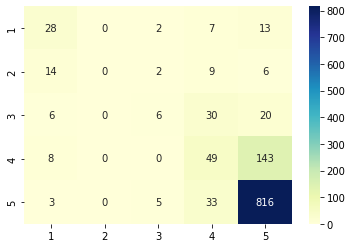

In [ ]:
ax= plt.subplot()


df_cm = pd.DataFrame(array, index = [i for i in "12345"],
                  columns = [i for i in "12345"])

sn.heatmap(df_cm, cmap="YlGnBu", fmt='g', annot=True)

In [ ]:
conditions = [result['label'] == result['predizione'], result['label'] != result['predizione']]


choices = ['corretta','sbagliata']

result['risultato'] = np.select(conditions, choices, default='Errore')

result.head(20)

,text,label,predizione,score,risultato
0,"spendi poco, hai poco, se cerchi una buona qua...",0,4,0.632623,sbagliata
1,La batteria lascia perdere un po’ a desiderare...,3,3,0.545875,corretta
2,ho voluto provare queste cartucce compatibili....,2,3,0.466020,sbagliata
3,"Fa il suo dovere, non si può pretendere troppo...",4,4,0.862610,corretta
4,Miglior acquisto degli ultimi tempi! Sia per l...,4,4,0.936151,corretta
5,Le prendo da qualche anno e posso dire che non...,4,4,0.898906,corretta
6,Bel prodotto e buon rapporto qualità - prezzo....,4,4,0.725428,corretta
7,"Prodotto buono, mi aspettavo scarpe un poco pi...",3,4,0.885985,sbagliata
8,"Prodotto, usato 2 volte e rimesso nella scatol...",2,0,0.373603,sbagliata
9,"Non ancora provate, buona fattura",2,4,0.471006,sbagliata


In [ ]:
result['risultato'].value_counts()

corretta     899
sbagliata    301
Name: risultato, dtype: int64

In [ ]:
x=result['risultato'].value_counts()

In [ ]:
x[0] / (x[0]+x[1])

0.7491666666666666